# IMPORTS

In [2]:
import pandas as pd
import os
from tabulate import tabulate
from pandarallel import pandarallel

# CONFIGURATION

In [3]:
# PREVIEW PHASE
PREVIEW_SIZE = 1000

# EXTRACT PHASE
CHUNK_SIZE = 100000
EXTRACT_PARQUET = False

# ANALYSE PHASE
SAMPLING_SIZE = 10000

ORIGINAL_DATASET_DIR = 'data/original/yelp_dataset/'
WORK_DATASET_DIR = 'data/work/yelp_dataset/'
PREFIX_YELP = 'yelp_academic_dataset_'

# FONCTIONS

In [4]:
def list_files(dir, extension='json', print_result = True):
    paths = {(file.split('.')[0]).split(PREFIX_YELP)[1]: dir + file for file in os.listdir(dir) if file.endswith('.' + extension)}
    if print_result:
        files = [[os.path.basename(paths[name]), file_size(paths[name])] for name in paths]
        print(tabulate(files, headers=['Name', 'Size']))
    return paths

def file_size(path, unit='Gb', precision=2, only_value = False):
    exp = 3
    if (unit=='ko'):
        exp = 1
    elif (unit == 'Mb'):
        exp = 2
    else:
        exp = 3
        unit = 'Gb'

    value = round((os.path.getsize(path)/(1024**exp)), precision)
    if only_value:
        return value
    else:
        return str(value) + unit

def preview_dataset(path):
    df = pd.read_json(path, lines=True, nrows=PREVIEW_SIZE)
    display(df.sample(5))
    display(df.dtypes)

    return df

def preprocess_text(text):
    from nltk import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    # normalization
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Stops Words
    stops = stopwords.words('english')
    tokens = [token for token in tokens if not token in stops]

    # Lematization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, pos='a') for word in tokens]
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    tokens = [lemmatizer.lemmatize(word, pos='n') for word in tokens]

    return ' '.join(tokens)

# PREVISUALISATION DES DATASETS

In [5]:
files = list_files(ORIGINAL_DATASET_DIR, print_result=False)
files

{'business': 'data/original/yelp_dataset/yelp_academic_dataset_business.json',
 'checkin': 'data/original/yelp_dataset/yelp_academic_dataset_checkin.json',
 'review': 'data/original/yelp_dataset/yelp_academic_dataset_review.json',
 'tip': 'data/original/yelp_dataset/yelp_academic_dataset_tip.json',
 'user': 'data/original/yelp_dataset/yelp_academic_dataset_user.json'}

In [6]:
preview_dfs = {}
for name in files:
    print(f'PREVIEW {name}\n=====================\n')
    preview_dfs[name] = preview_dataset(files[name])
    print('')

PREVIEW business



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
884,YmldZ34wq5v1Y4yLclNQ5g,Sport Clips Haircuts of Exton,60 E Uwchlan Ave,Exton,PA,19341,40.058584,-75.654468,4.0,11,1,"{'BikeParking': 'False', 'ByAppointmentOnly': ...","Men's Hair Salons, Hair Salons, Barbers, Beaut...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
995,iNMdSi5bmvGSGeRQiUW4dw,Wendy's,3535 E. Irvington Road,Tucson,AZ,85714,32.163740,-110.916722,2.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Fast Food, Burgers, Restaurants","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'..."
579,DwkUcTFaFhqcW-RDJ5rnNQ,Children's Dental And Orthodontic Associates,7847 Old York Rd,Elkins Park,PA,19027,40.072714,-75.131515,2.5,6,0,{'ByAppointmentOnly': 'True'},"Orthodontists, Health & Medical, Pediatric Den...","{'Monday': '8:30-17:0', 'Wednesday': '8:30-17:..."
848,61oyIzeFjG977kMhMxVznw,Distler's Auto Repair,100 N Main St,O Fallon,IL,62269,38.561634,-89.896862,4.0,5,1,None,"Towing, Automotive, Auto Parts & Supplies, Aut...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
518,pJB63RaQpkTIKBhfTsLQQg,Biryani Hut,"14350 Mundy Dr, Ste 700",Noblesville,IN,46060,39.997088,-86.002312,4.0,83,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Indian","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2..."


business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object


PREVIEW checkin



,business_id,date
712,-KncfNxXHo2DA46fR39K5w,"2011-08-01 00:45:21, 2011-08-01 12:26:10, 2011..."
882,-QbKo-L0oRtGDX8usj75Dw,"2010-07-31 16:03:47, 2012-12-27 17:54:44, 2013..."
194,-4VQum5gCgEfSZcFycmAHw,"2017-04-21 21:59:54, 2017-09-17 19:39:50, 2017..."
421,-BdYhP-12elmFV7oB1iv4A,"2020-07-12 21:11:56, 2020-07-27 18:12:43, 2020..."
16,--SJXpAa0E-GCp2smaHf0A,"2014-04-06 22:23:56, 2014-07-19 16:40:24, 2014..."


business_id    object
date           object
dtype: object


PREVIEW review



,review_id,user_id,business_id,stars,useful,funny,cool,text,date
754,H9qRr0lRUG-Bmol-Lw2Iiw,njh1nsVTKP2gCfUvbnCn8w,qEBL7U0kW4lkptcd_4wWbg,5,0,0,0,This place is so lovely! I went for a sweet an...,2017-07-08 19:35:16
460,0aC3eVgDQFE6gH2Fk-MrDg,gL0PnnFMmJbWphaOh_6BsQ,Mha77MN_BYGB-w7DONZ5YA,4,3,0,1,This review is mainly chicken talk as Cuenelli...,2013-11-14 01:23:03
376,5GNDjFV7Vi7Uganf6OlAbg,7OUAzKZj6LUrQ3G7g7yUSw,S3Kl763P-wKnDLFy0iirqA,2,2,2,0,"Let's be honest, this place needs a face lift....",2014-11-30 00:39:26
80,RGV9GWhAAfAAlYyd4vho7g,Zs8Zk3sgh5JxRmoZW4PJcg,3ZynJ94VpIdDlaArmEp2Rg,3,0,0,0,A couple friends and I stopped by for some lat...,2013-10-03 16:24:30
26,G_5UczbCBJriUAbxz3J7Tw,clWLI5OZP2ad25ugMVI8gg,x4XdNhp0Xn8lOivzc77J-g,5,0,0,0,Best thai food in the area. Everything was au...,2013-08-15 15:27:51


review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object


PREVIEW tip



,user_id,business_id,text,date,compliment_count
893,sjhfo0pdn2zCAYTFChWevQ,o8JeOB8HTa5HYHg6hfqTHw,There is no dining area this is take away.,2013-02-17 11:56:26,0
500,EpJ7t6PL6aEXvkvTiftjtw,AixPbZxJkgRyjxVqrpPAmw,Don't be afraid if there's a wait...stick arou...,2012-10-21 13:54:03,0
518,cynJeGho1spyXikHubXIoQ,xdy61kO_r5p6Zw30dsZ-ng,Yelp event!!!,2013-12-05 00:34:09,0
69,VWJ8PSz6Sg5_AlBvQyGvpw,PcX8zGIJ_XHTAQAcEOwhLw,"Nice resort, right by the powder white beach!",2013-06-14 22:54:16,0
167,irIWWqUSS06qYH8kSrGqrg,BcWx80K4i0LjIkH40o_Kkg,Love it there been going for years. Chelsea i...,2015-01-21 03:47:26,0


user_id                     object
business_id                 object
text                        object
date                datetime64[ns]
compliment_count             int64
dtype: object


PREVIEW user



,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
874,f4dLioOMUxpLq9a1ph0REw,Ange,111,2009-03-29 01:33:33,210,97,55,2011,"c75zarK3JTDvi_mVbEGgRA, K4MIJl1lenGlO1Agse7JWQ...",7,...,0,0,0,0,4,12,6,6,5,0
509,YUFqbfAePA8tgT2zE2y4xQ,Annie,191,2008-04-10 02:46:54,942,447,685,"2008,2009,2010,2011,2012","dLldOSUWXhC76awQEn4qhg, 8Ces6YdT6j7BYycnZLrSng...",36,...,10,3,25,10,39,82,174,174,23,17
52,qsHZ6_yT870pmm4Oxvw5Og,Debbie,39,2011-06-16 01:55:54,68,14,19,,"z5owge5-GGcotX92-_XKDg, ow_8z-yarVPitiDq2YfjnQ...",5,...,1,0,0,0,0,1,0,0,0,0
557,RFTVBFlgM0cqvl1daywfjQ,Kara,465,2007-12-25 05:03:41,354,111,198,"2008,2009,2010,2011,2012,2019,20,20,2021","3Vd_ATdvvuVVgn_YCpz8fw, yFLNHDlCriteboCVKjtpbA...",24,...,3,1,5,0,9,18,27,27,12,1
354,SZ8qITipYmexfotE5_UaQg,Beth,417,2007-03-07 23:01:49,2039,1391,1570,"2007,2008,2009,2010","XH7vjN6QuL9Cedet3j4vEQ, VaVzAV3Bp3Vv7g6J3NmEGA...",93,...,32,19,74,22,105,185,343,343,90,40


user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object

<Axes: xlabel='stars'>

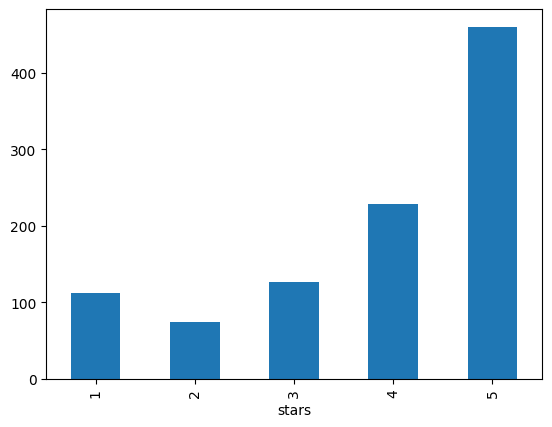

In [7]:
preview_dfs['review']['stars'].value_counts().sort_index().plot.bar()

In [8]:
preview_dfs['business']['categories'].unique()[0:20]

array(['Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
       'Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services',
       'Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores',
       'Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries',
       'Brewpubs, Breweries, Food',
       'Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants',
       'Sporting Goods, Fashion, Shoe Stores, Shopping, Sports Wear, Accessories',
       'Synagogues, Religious Organizations',
       'Pubs, Restaurants, Italian, Bars, American (Traditional), Nightlife, Greek',
       'Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food',
       'Department Stores, Shopping, Fashion',
       'Vietnamese, Food, Restaurants, Food Trucks',
       'American (Traditional), Restaurants, Diners, Breakfast & Brunch',
       'General Dentistry, Dentists, Health & Medic

In [9]:
review = preview_dfs['review']
for star in range(1,6):
    print(f'Note = {star}:\n=========\n')
    for index in review[review['stars']==star].sample(4, random_state=0).index:
        stars, text = review.loc[index, ['stars', 'text']].values
        print(f'{text}\n\n')

Note = 1:

They have the WORST service advisors! Used to be good before Kelly and her team left. Unfortunately, it's convenient to work if I need oil change before I can make it to another Honda dealer.


It is unfortunate that with such a unique location and such a brand and product offering this specific store offers such lousy service. The wait is endless, no one is available to help and at Christmas time getting a gift wrap is act of God that requires endless wait. I bought gifts and knew that the wait for wrapping would be long SO I even left my items at the store to be gift wrapped at their leisure. They were not even moved from the counter where I bought them when I returned almost two hours later ready for pick up. This was a gift that needed to be given and The staff COMPLETELY "dropped the ball" on my time constraints! 

I love their stuff, but today was my last shopping experience at this location: couldn't get a gift wrapped after being assured that it could be done in a ti

<Axes: xlabel='class'>

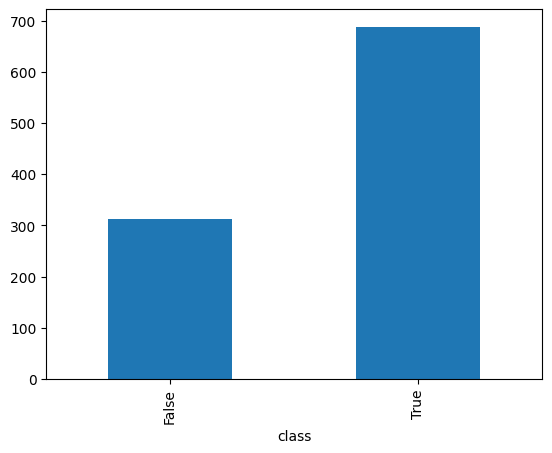

In [10]:
preview_dfs['review']['class'] = preview_dfs['review']['stars'] > 3
preview_dfs['review']['class'].value_counts().sort_index().plot.bar()

# EXTRACTION GOOD/BAD REVIEWS DES RESTAURANTS

## CATEGORIES DE BUSINESS

In [11]:
business = pd.read_json(ORIGINAL_DATASET_DIR + PREFIX_YELP + 'business.json', lines=True)
business['_cats'] = business['categories'].apply(lambda x: [cat.strip() for cat in x.split(',')] if x else [])
business['_cats'].sample(5)

149268    [Nurseries & Gardening, Landscape Architects, ...
9929      [Hotels, Event Planning & Services, Hotels & T...
42545                 [Restaurants, American (Traditional)]
29703     [Botanical Gardens, Event Planning & Services,...
124282                     [Sandwiches, Delis, Restaurants]
Name: _cats, dtype: object

In [12]:
categories = set()
for index in business.index:
    categories.update(business.loc[index, '_cats'])

In [13]:
[categorie for categorie in categories if 'restaurant' in categorie.lower()]

['Restaurants', 'Pop-Up Restaurants', 'Restaurant Supplies']

In [14]:
[categorie for categorie in categories if 'food' in categorie.lower()]

['Food Stands',
 'Food',
 'Food Trucks',
 'Seafood',
 'Do-It-Yourself Food',
 'Food Tours',
 'Fast Food',
 'Food Court',
 'Food Delivery Services',
 'Ethnic Food',
 'Imported Food',
 'Food Banks',
 'Live/Raw Food',
 'Seafood Markets',
 'Comfort Food',
 'Specialty Food',
 'Soul Food']

## REDUCTION DU DATAFRAME REVIEW ET SAUVEGARDE

- par chunk de 100000
- Filtrage des reviews sur categorie "restaurants"
- Séparation en bad/good reviews (bad <= stars = 3 < good)
- Ne garder que text et séparer en 2 fichiers good/bad news

In [15]:
restaurants_ids = business[~business['categories'].isna() & business['categories'].str.contains('Restaurants')]['business_id'].to_list()
restaurants_ids[0:10]

['MTSW4McQd7CbVtyjqoe9mw',
 'CF33F8-E6oudUQ46HnavjQ',
 'k0hlBqXX-Bt0vf1op7Jr1w',
 'bBDDEgkFA1Otx9Lfe7BZUQ',
 'eEOYSgkmpB90uNA7lDOMRA',
 'il_Ro8jwPlHresjw9EGmBg',
 '0bPLkL0QhhPO5kt1_EXmNQ',
 'MUTTqe8uqyMdBl186RmNeA',
 'ROeacJQwBeh05Rqg7F6TCg',
 'WKMJwqnfZKsAae75RMP6jA']

In [16]:
append = False
good_reviews_file = WORK_DATASET_DIR + 'good_reviews.parquet'
bad_reviews_file = WORK_DATASET_DIR + 'bad_reviews.parquet'

if EXTRACT_PARQUET:
    for chunk in pd.read_json(ORIGINAL_DATASET_DIR + PREFIX_YELP + 'review.json', lines=True, chunksize=100000):
        restaurant_reviews = chunk[chunk['business_id'].isin(restaurants_ids)].copy()
        restaurant_reviews['class'] = restaurant_reviews['stars'] > 3
        restaurant_reviews = restaurant_reviews.loc[:, ['text', 'class']]
    
        good_reviews = pd.DataFrame(restaurant_reviews[restaurant_reviews['class'] == True]['text'])
        bad_reviews = pd.DataFrame(restaurant_reviews[restaurant_reviews['class'] == False]['text'])
    
        good_reviews.to_parquet(WORK_DATASET_DIR + 'good_reviews.parquet', engine='fastparquet', append=append)
        bad_reviews.to_parquet(WORK_DATASET_DIR + 'bad_reviews.parquet', engine='fastparquet', append=append)
        append = True

In [17]:
bad_reviews = pd.read_parquet(bad_reviews_file)

In [18]:
bad_reviews.head()

,text
index,
0,"If you decide to eat here, just be aware it is..."
2,Family diner. Had the buffet. Eclectic assortm...
5,I am a long term frequent customer of this est...
9,Had a party of 6 here for hibachi. Our waitres...
21,"Upland is a brewery based out of Bloomington, ..."


In [19]:
pandarallel.initialize(progress_bar=True)

if SAMPLING_SIZE:
    bad_reviews = bad_reviews.sample(SAMPLING_SIZE, random_state=0)

bad_reviews['text'] = bad_reviews['text'].parallel_apply(preprocess_text)
bad_reviews.sample(5)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


,text
index,
2801606,go & b 's today . sit bar hand menu . place pr...
306312,airport renovation stay away absolutely airpor...
4894051,"simple breakfast . small cross ihop , denny 's..."
4396184,"great happy hour sushi , kind food pretty good..."
5478629,total fail mother 's day brunch ... check yelp...
